# IML Assignment 1

## Name: Abdurahmon Abdukhamidov


## Mail: a.abdukhamidov@innopolis.university


## Group: DS-01

### Code style policy

We expect you to follow https://peps.python.org/pep-0008/ Python standart style and will reduce your points if you don't. Also we ask you to comment your code when it's needed (logical blocks, function declaration, loops), however over-documentation is the evil.

Example of nice code style (no need to run this cells):

In [1]:
# This function returns the sum of parameters
# @param my_param1 - here I explain what this parameter means
# @param my_param2 - here I explain what this parameter means
# @return - result of func if it's not void
def my_func(my_param1: int, my_param2: int):
    return my_param1 + my_param21

There are few lines only, but they are represents important logical blocks, thus you should explain what their purpose:

In [2]:
from my_training_package import my_regression, my_loader

# Data loading
x, y = my_loader.load("some.csv")

# Training
reg = my_regression()
reg.train(x,y)

# Evaluation on the same data set
y_pred = reg.evaluation(y)

ModuleNotFoundError: No module named 'my_training_package'

Example of too detailed and meaningless commenting that is not welcome:

In [3]:
# Import numpy package
import numpy as np
# This is variable x
x = 5
# This is variable y
y = 10
# Print x
print(x)

5


Ultimately, we belive in your programming common sense :) The purpose of clear code style is fast and smooth grading of your implementation and checking that you understand ML concepts.

## Task 1

### 3.1. Linear Regression
#### Data reading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd


# TODO Write your code here
path = '/content/drive/MyDrive/train_1.csv'
df = pd.read_csv(path)


In [6]:
df

,Unnamed: 0,X_1,X_2,X_3,X_4,y
0,0,-1.924727,0.267947,0.596127,-1.150032,-5.195673
1,1,0.545333,-0.745503,2.773248,-0.975761,-20.118000
2,2,-1.833045,0.142620,-1.061453,-1.019242,0.630503
3,3,-1.297052,-0.857997,2.815755,-1.334396,-31.195297
4,4,-0.864305,-2.116955,6.347915,1.140341,-272.137746
...,...,...,...,...,...,...
195,195,1.653553,-0.096667,0.402027,-0.472891,1.793250
196,196,2.345335,0.035387,0.391385,-1.781740,-6.998007
197,197,-0.862325,-1.020685,2.016208,-2.297696,-38.482399
198,198,-2.058131,-2.434812,7.501821,-0.007159,-454.849180


#### Train\validation splitting

In [7]:
from sklearn.model_selection import train_test_split

# TODO Write your code here
X = df.drop(columns = ['y', 'Unnamed: 0'])

y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression


# Declare and train a linear regression model
# TODO Write your code here
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
# TODO Write your code here
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [9]:
from sklearn import metrics

# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    # TODO Write your code here
    mse = metrics.mean_squared_error(y_actual, y_pred)
    rmse = mse ** 0.5
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    r2 = metrics.r2_score(y_actual, y_pred)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R2 Score:", r2)

print_metrics(y_test, y_pred_lr)

Mean Squared Error (MSE): 4981.420462673978
Root Mean Squared Error (RMSE): 70.57917867667474
Mean Absolute Error (MAE): 59.68387524655598
R2 Score: 0.8878644733172234


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [10]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [11]:
# TODO Write your code here
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Declare a GridSearch instance
# TODO Write your code here
param_grid = {
    'poly_features__degree': np.arange(2, 6)  # You can adjust the range as needed
}
search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=8)


# Train the GridSearch
# TODO Write your code here
search.fit(X_train, y_train)

# Find the optimum degrees
# TODO Write your code here
optimum_degree = search.best_params_['poly_features__degree']
print('optimum degree:', optimum_degree)
y_pred = search.predict(X_test)


# Print the GridSearchCV score
# TODO Write your code here
print(f"search score: {search.best_score_}")

optimum degree: 4
search score: -0.41105872118883446


In [13]:
print_metrics(y_train, search.predict(X_train))

Mean Squared Error (MSE): 0.07837235047367744
Root Mean Squared Error (RMSE): 0.2799506214918578
Mean Absolute Error (MAE): 0.2251505405618263
R2 Score: 0.999997172187557


#### Save the model

In [14]:
import pickle

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

In [15]:
# TODO Write your code here

#To determine linear dependence we have to find correlation matrix:
correlation_matrix = X_train.corr()
n = correlation_matrix.shape[0]
correlation_matrix

,X_1,X_2,X_3,X_4
X_1,1.000000,0.052261,-0.050217,-0.059351
X_2,0.052261,1.000000,-0.989703,0.055109
X_3,-0.050217,-0.989703,1.000000,-0.071828
X_4,-0.059351,0.055109,-0.071828,1.000000


In [16]:
corr = []
for i in range(n):
    for j in range(i+1, n):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: # I will take threshold as 0.7
            corr.append((i, j))
for feature in corr:
    print(f"Features {feature[0]} and {feature[1]} are highly correlated!")

Features 1 and 2 are highly correlated!


## Task 2

### 4.1 Data processing
#### Loading the dataset

In [17]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [18]:
# TODO Write your code here
path = '/content/drive/MyDrive/pokemon_modified.csv'
df = pd.read_csv(path)

In [19]:
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [21]:
#Features "name" and "classification" are useless. Because they don't affect to the result of the classification at all.
#For example from the name doesn't have any influence in anything. That's why I will remove them.
df_filtered = df.drop(columns=["name", "classification"])
X = df_filtered.drop(columns = ["is_legendary"])
y = df_filtered["is_legendary"]

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [22]:
from sklearn.model_selection import train_test_split
# TODO Write your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,experience_growth,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation
362,1.0,1.0,1.0,2.0,1.0,2.0,1.00,1.0,1.0,2.0,...,1059860,0.8,70,50.0,ice,55,50,25,39.5,3
132,1.0,1.0,1.0,1.0,1.0,2.0,1.00,1.0,0.0,1.0,...,1000000,0.3,55,88.1,normal,45,65,55,6.5,1
704,1.0,1.0,2.0,0.5,2.0,1.0,0.50,1.0,1.0,0.5,...,1250000,0.8,68,50.0,dragon,83,113,60,17.5,6
9,1.0,1.0,1.0,1.0,1.0,0.5,2.00,2.0,1.0,0.5,...,1000000,0.3,45,50.0,bug,20,20,45,2.9,1
687,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.0,...,1000000,0.5,42,50.0,rock,39,56,50,31.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.0,1.0,1.0,2.0,1.0,1.0,0.50,1.0,1.0,2.0,...,1000000,1.3,55,50.0,water,50,50,75,60.0,1
322,0.5,1.0,1.0,0.0,0.5,1.0,0.50,1.0,1.0,1.0,...,1000000,1.9,70,50.0,fire,145,105,20,220.0,3
382,1.0,1.0,1.0,0.0,1.0,1.0,1.00,1.0,1.0,2.0,...,1250000,3.5,100,NaN,ground,150,90,90,950.0,3
365,1.0,1.0,1.0,2.0,1.0,1.0,0.50,1.0,1.0,2.0,...,600000,0.4,35,50.0,water,74,55,32,52.5,3


Check if the dataset is balanced or not and comment on it

In [24]:
Zeros = y_train.value_counts()[0]
Ones = y_train.value_counts()[1]
ratio = Zeros / Ones
print(ratio)
# it is imbalanced, because ratio is too high.

11.075471698113208


<font color='blue'>As we see it is imbalanced case.</font>




#### Checking for missing values

In [25]:
# TODO Write your code here
from sklearn.impute import SimpleImputer
df_filtered.isnull().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64

#### Impute the missing values

In [26]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer instance
# TODO Write your code here
columns_with_nan = ["percentage_male", "weight_kg", "height_m"]
imputer = SimpleImputer(strategy='mean')
# Apply the imputer
# TODO Write your code here
X_train[columns_with_nan] = imputer.fit_transform(X_train[columns_with_nan])
X_test[columns_with_nan] = imputer.fit_transform(X_test[columns_with_nan])

#### Double check that there are no missing values

In [27]:
# TODO Write your code here
X_train.isnull().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64

In [28]:
X_train.isnull().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64

#### Encode categorically

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 362 to 510
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 n

In [30]:
from sklearn.preprocessing import OneHotEncoder

type1_train_conv = X_train['type1'].values.reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Encode type1 column
train_encode = encoder.fit_transform(type1_train_conv)
train_encode_df = pd.DataFrame(train_encode, columns=encoder.get_feature_names_out(['type1']))
train_encode_df.reset_index(drop=True, inplace=True)

# Concatenate X_train with train_encode_df
X_train_concatenated = pd.concat([X_train.reset_index(drop=True), train_encode_df], axis=1)
X_train_concatenated = X_train_concatenated.drop('type1', axis=1)

#############################################################################3
# I will do the same encoding for X_test.

type1_test_conv = X_test['type1'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Let's encode:
test_encode = encoder.fit_transform(type1_test_conv)
test_encode_df = pd.DataFrame(test_encode, columns=encoder.get_feature_names_out(['type1']))
test_encode_df.reset_index(drop=True, inplace=True)

X_test_concatenated = pd.concat([X_test.reset_index(drop=True), test_encode_df], axis=1)
X_test_concatenated = X_test_concatenated.drop('type1', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
X_test_concatenated.isnull().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
type1_bug            0
type1_dark           0
type1_dragon         0
type1_electric       0
type1_fairy          0
type1_fighting       0
type1_fire           0
type1_ghost          0
type1_grass          0
type1_ground         0
type1_ice  

#### Scale the data

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Define a scaler instance from one of the above
# TODO Write your code here
scaler = MinMaxScaler()

# Apply the scaler on both train and test features
# TODO Write your code here
x_train = scaler.fit_transform(X_train_concatenated)
x_test = scaler.fit_transform(X_test_concatenated)

#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

<ipython-input-33-ddbb421d659b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


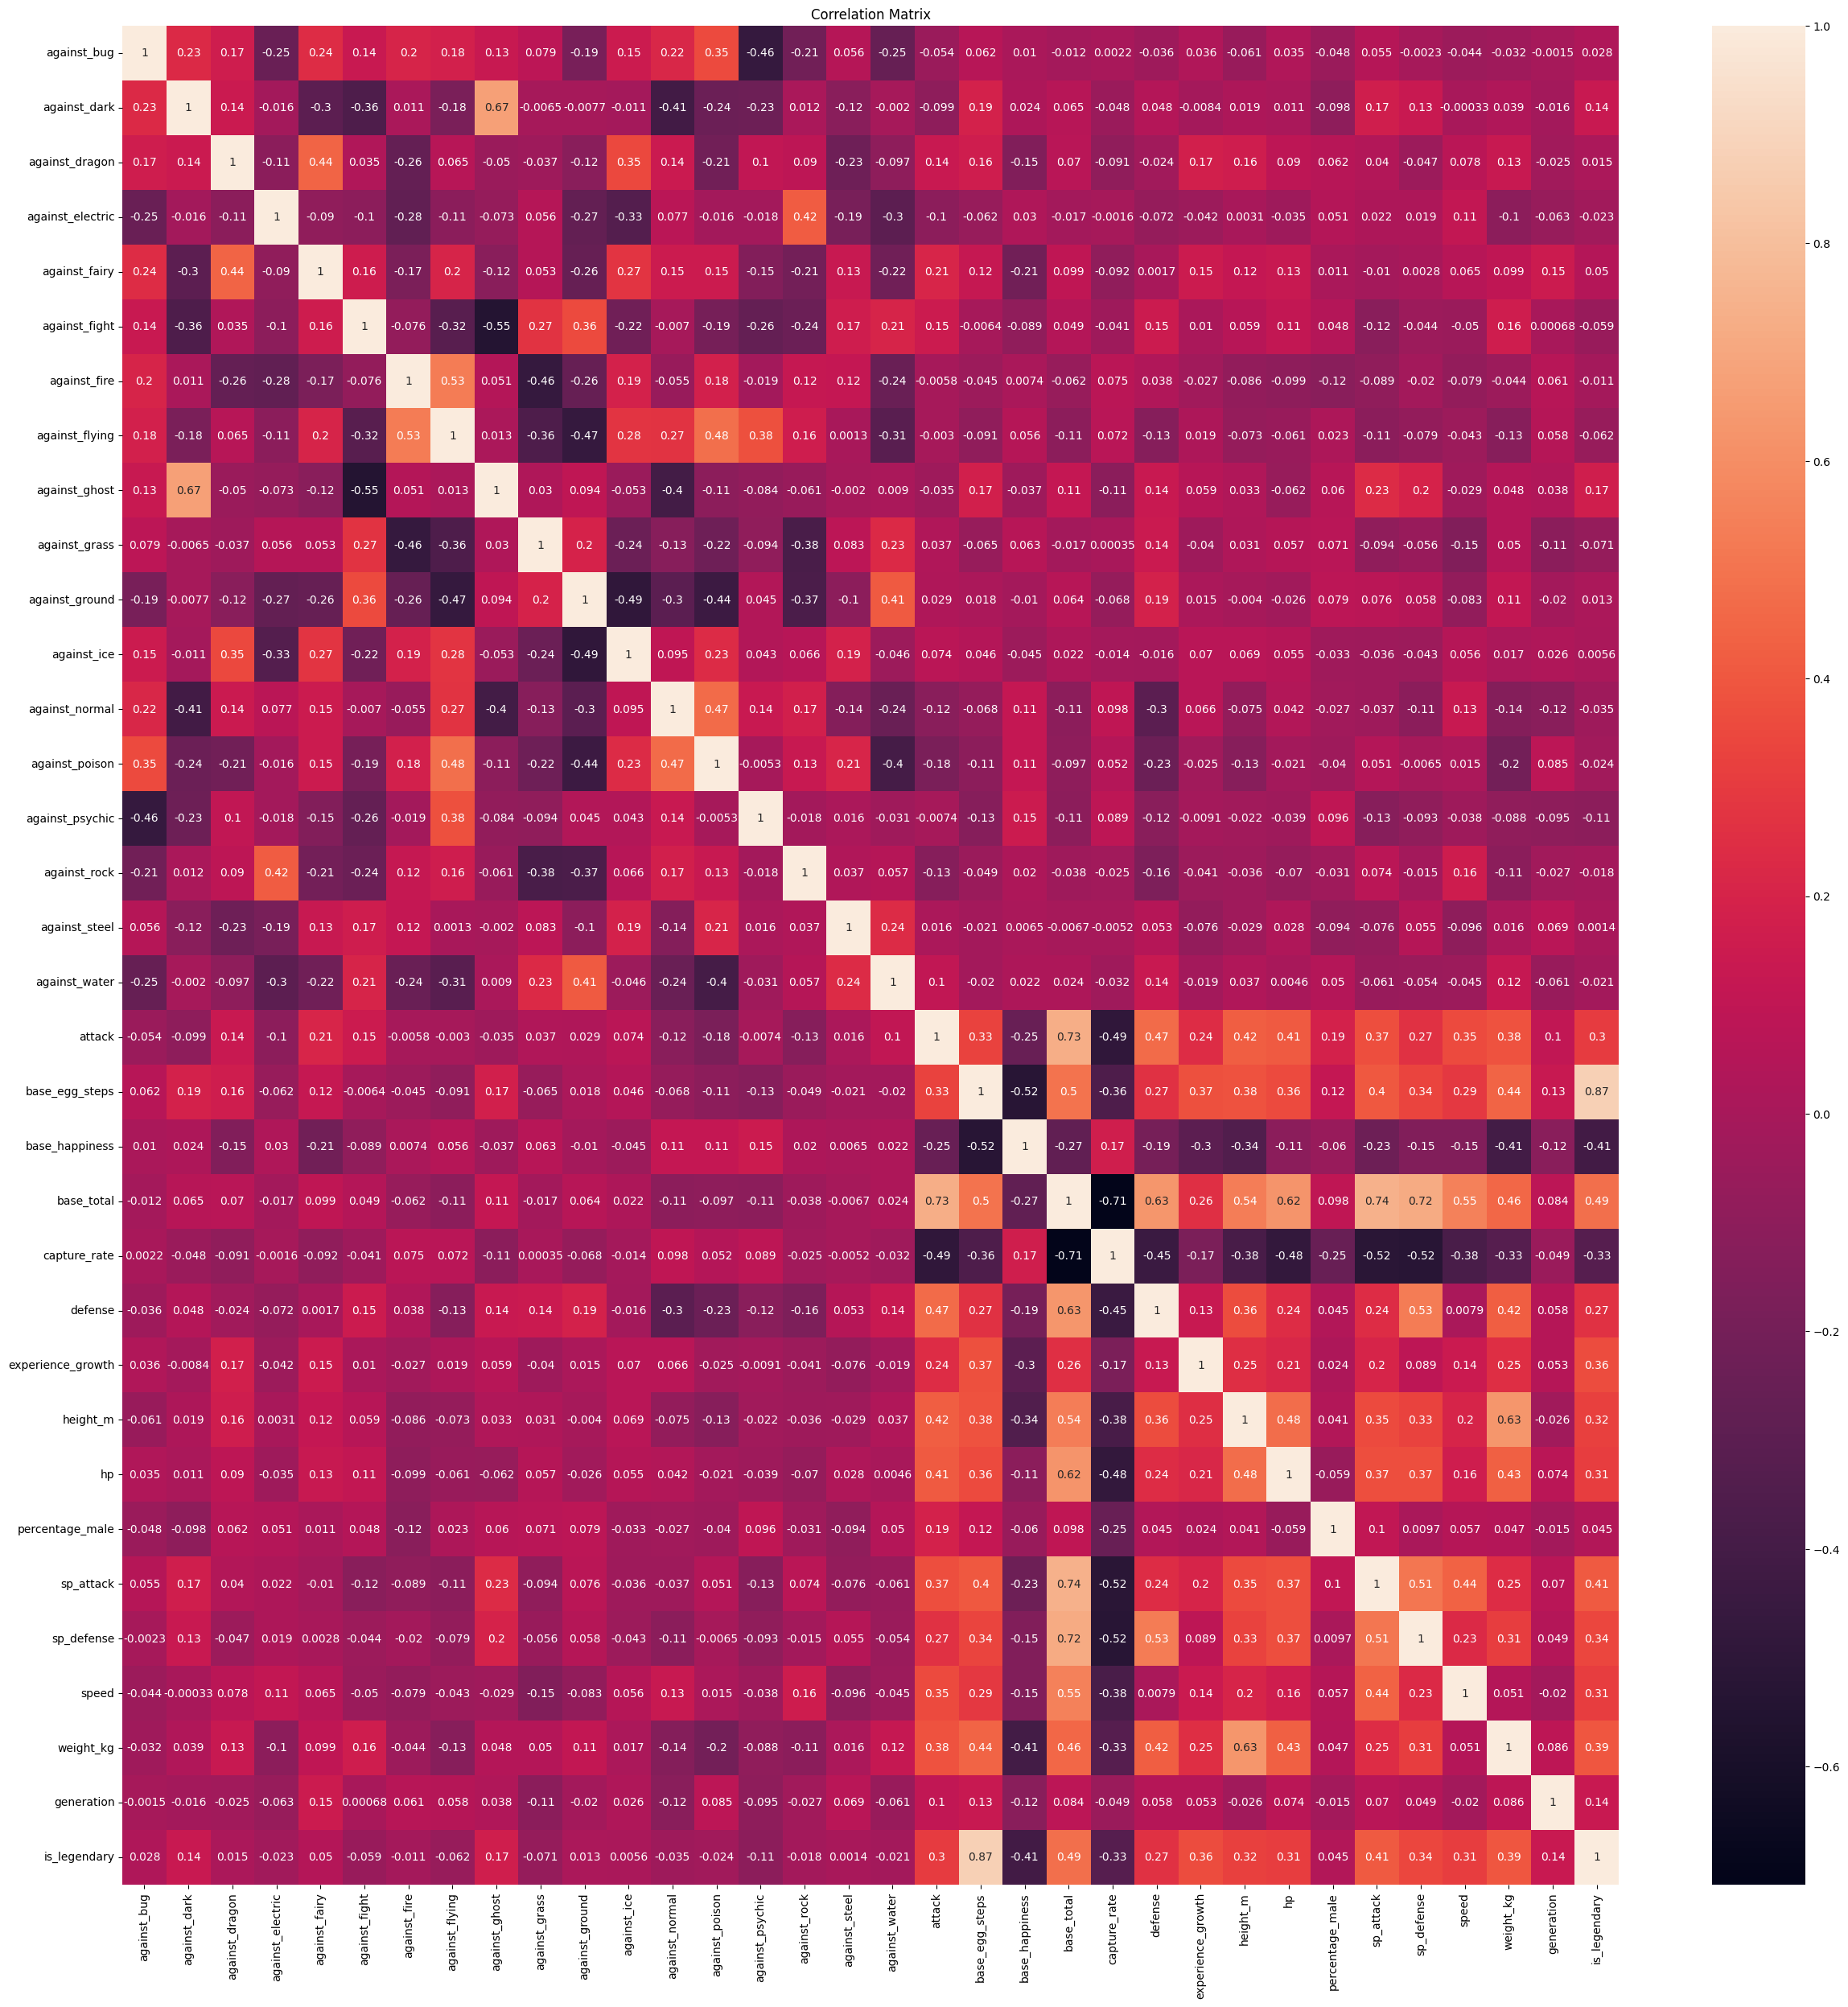

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
# Plot the correlation matrix
# TODO Write your code here
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<font color='blue'>Explaining: There is highly co-related features. The coefficient is 0.87, which is too high. We have such high corelation between "base_egg_steps" and "is_legendary". We can roughly drop one of the features, because correlation coefficient is too high.</font>


### 4.2 Model fitting and Comparison

#### Tuning LR model

In [34]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score
# TODO Write your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_clf_metrics(y_actual, y_pred ):
    accuracy = accuracy_score(y_actual, y_pred)
    prec = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", prec)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [35]:
# Specify GridSearchCV as in intruction
# TODO Write your code here
parameters = {
    'penalty': ['l1', 'l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [36]:
y_train_array = np.array(y_train)

y_train_flattened = y_train_array.ravel()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above
# Set max_iter=1000 in LR constructor
# TODO Write your code here
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=7, scoring='f1')
grid_search.fit(x_train, y_train_flattened)
best_params = grid_search.best_params_
lr_clf_gs = LogisticRegression(**best_params, max_iter=1000)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
98 fits failed out of a total of 294.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [38]:
best_params

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [39]:
print("Tuned Hyperparameters :", best_params)
print("Accuracy :", grid_search.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9181580324437467


#### Construct a LR with the best params and Evaluate the LR with the best params

In [40]:
lr_clf = LogisticRegression(**best_params, max_iter=1000)

lr_clf.fit(x_train, y_train)

lr_y_pred = lr_clf.predict(x_test)

In [41]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9875776397515528
Precision: 0.9411764705882353
Recall: 0.9411764705882353
F1 Score: 0.9411764705882353


#### Print the top 5 most influencing features and the top 5 ignored features

In [42]:
# TODO Write your code here

# For linear model we can not use lr_clf.feature_importances_ function, cause it's for tree based model.
# That's why I will take coefficients and manually find most important features
features_name = X_test_concatenated.columns
coeff_abs = abs(lr_clf.coef_[0])


top_5 = []
top_5_scores = []
top_indices = coeff_abs.argsort()[-5:][::-1]

print('top 5 influenced:')
for i in top_indices:
  top_5.append(features_name[i])
  top_5_scores.append(lr_clf.coef_[0][i])
  print(features_name[i], ' ', lr_clf.coef_[0][i])

tail_5 = []
tail_indices = coeff_abs.argsort()[::1][:5]
tail_5_scores = []

print()
print('top 5 ignored:')
for i in tail_indices:
  tail_5.append(features_name[i])
  tail_5_scores.append(lr_clf.coef_[0][i])
  print(features_name[i], ' ', lr_clf.coef_[0][i])



top 5 influenced:
base_egg_steps   8.511636952145754
capture_rate   -4.365686607315899
against_dragon   -3.936877570154992
type1_normal   -1.7080165949566994
base_total   1.4314214390733548

top 5 ignored:
against_bug   0.0
height_m   0.0
hp   0.0
percentage_male   0.0
sp_attack   0.0


#### Tuning KNN model

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
# TODO Write your code here
param_grid = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
clf = KNeighborsClassifier()
clf_gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
y_train_flattened = np.ravel(y_train)

clf_gs.fit(x_train, y_train_flattened)
best_params = clf_gs.best_params_
best_score = clf_gs.best_score_

print("Tuned Hyperparameters :", best_params)
print("Accuracy :", best_score)

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.959375


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [44]:
# TODO Write your code here
clf = KNeighborsClassifier(**best_params)
clf.fit(x_train, y_train_flattened)
y_pred = clf.predict(x_test)
print_clf_metrics(y_test, y_pred)

Accuracy: 0.968944099378882
Precision: 0.9285714285714286
Recall: 0.7647058823529411
F1 Score: 0.8387096774193549


#### Fitting GNB to the data and evaluating on the test dataset

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Declare and train GaussianNB. No hyperparameters tuning
# TODO Write your code here
gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train_flattened)
y_pred = gauss_nb.predict(x_test)

print_clf_metrics(y_test, y_pred)

Accuracy: 0.9130434782608695
Precision: 0.5517241379310345
Recall: 0.9411764705882353
F1 Score: 0.6956521739130435


#### Which metric is most appropriate for this task and why?



#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain




<font color='blue'>Prioritizing recall as the evaluation metric would be appropriate. Because we shouldn't skip pokemon, even if we have false positive cases</font>


In [46]:
#Explaination:
#For accuracy LR is best model.
#For precision LR is best model.
#For recall LR is the best model.
# For F1-score LR is the best model.

# So LR is the best model for this task!

## 5. Bonus Task

#### Loading the Dataset

In [47]:
import pandas as pd

# TODO Write your code here
train_data = pd.read_csv('/content/drive/MyDrive/bonus_train.csv')

test_data = pd.read_csv('/content/drive/MyDrive/bonus_test.csv')

In [48]:
# Split the data
# TODO Write your code here
X_train = train_data.drop(columns = 'target')
y_train = train_data['target']

X_test = test_data.drop(columns = 'target')
y_test = test_data['target']
print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

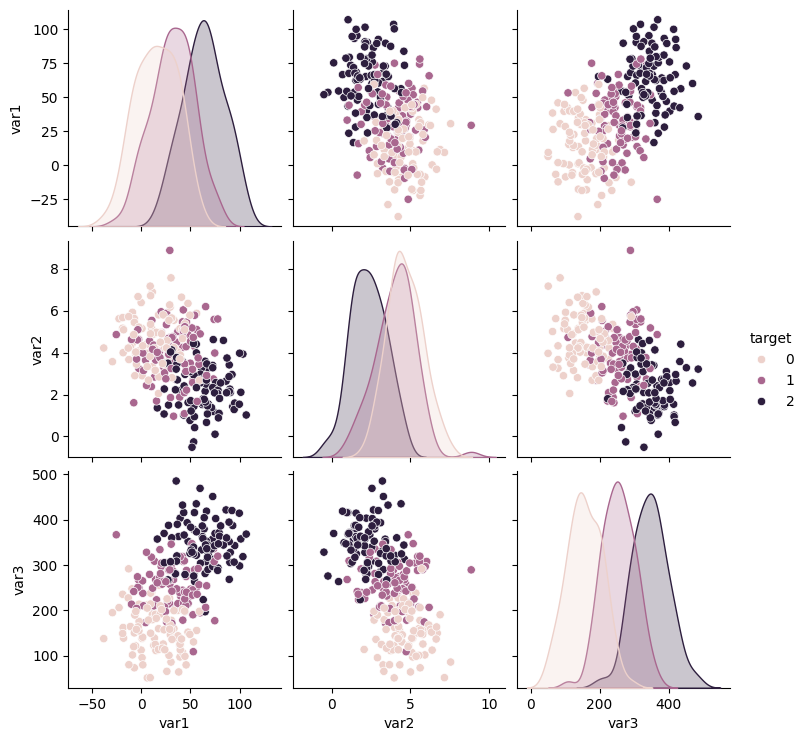

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# TODO Write your code here
sns.pairplot(train_data, kind="scatter", hue="target")
plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [50]:
# TODO Write your code here
from sklearn.linear_model import LogisticRegression

# Fit Logistic Regression model using one-vs.-rest (OvR) approach
ovr_lr = LogisticRegression(multi_class='ovr', max_iter=1000)
ovr_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [51]:
# TODO Write your code here
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

#### Using gridsearch to tune the C value and multi class

In [52]:
# TODO Write your code here

params = {
    'C': np.logspace(-10, 10, 7),
    'multi_class': ['multinomial', 'ovr']
}
clf = LogisticRegression(max_iter=1000)

grid_search_clf = GridSearchCV(clf, params, cv=5, n_jobs=-1)

grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']})

In [53]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [54]:
# TODO Write your code here
multi_lr = grid_search_clf.best_estimator_

In [55]:
multi_lr.get_params()

{'C': 2154.4346900318865,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
X_train

,var1,var2,var3
0,63.973548,2.726496,379.882305
1,10.906092,5.529845,207.272945
2,73.482382,2.739803,335.491727
3,28.937856,3.666386,226.279807
4,33.315477,5.540084,159.608987
...,...,...,...
265,87.227771,3.738061,320.135382
266,-4.605994,3.688628,204.136303
267,44.178216,5.085936,198.365089
268,6.169277,3.328219,204.934675


#### Visualize the decision boundaries

In [57]:
# I drop var2, because it's highly correlated with target.
x_train = X_train.drop(['var2'], axis = 1)
x_test = X_test.drop(['var2'], axis = 1)

In [58]:
multi_lr = LogisticRegression(max_iter=1000, C = 2154, multi_class = 'multinomial')

In [59]:
multi_lr.fit(x_train, y_train)

LogisticRegression(C=2154, max_iter=1000, multi_class='multinomial')

In [60]:
mean_accuracy = multi_lr.score(x_test, y_test)
print(mean_accuracy)

0.8333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


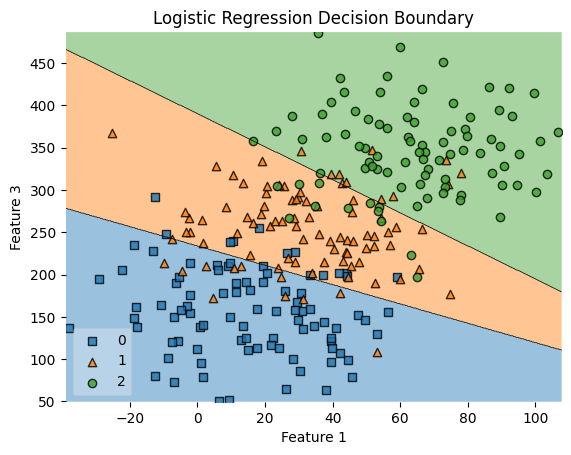

In [61]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()




# Plot decision regions with filler values
plot_decision_regions(x_train_np, y_train_np, clf=multi_lr, legend=3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Logistic Regression Decision Boundary')
plt.show()


#### Comment on the decision boundary, do you think this is a good model or not? and based on what?